# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

# Processing

### Vieira19_published

In [2]:
raw_ad0 = sc.read('vieira19.lognorm.h5ad')

In [4]:
raw_ad0.obs['BroadCellType'] = ss.lib.regroup(raw_ad0, 'CellType', {
    'Basal': ['Basal 1', 'Basal 2'],
    'Ciliated': ['Ciliated 1', 'Ciliated 2'],
    'Secretory': ['Club', 'Goblet 1 ', 'Goblet_1', 'Goblet 2'],
})
raw_ad0.obs['BroadCellType'].cat.reorder_categories(sorted(raw_ad0.obs['BroadCellType'].cat.categories), inplace=True)

In [6]:
raw_ad0

AnnData object with n_obs × n_vars = 36931 × 33694 
    obs: 'Sample', 'Donor', 'Source', 'Location', 'CellType', 'BroadCellType'

In [7]:
raw_ads = ss.lib.split_by_group(raw_ad0, groupby='Location', out_type='list')

In [8]:
ads = []

In [9]:
for raw_ad in raw_ads:
    ad = ss.lib.simple_default_pipeline(raw_ad, batch='Donor', post_norm_only=True, zero_center=True)
    ads.append(ad)

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/

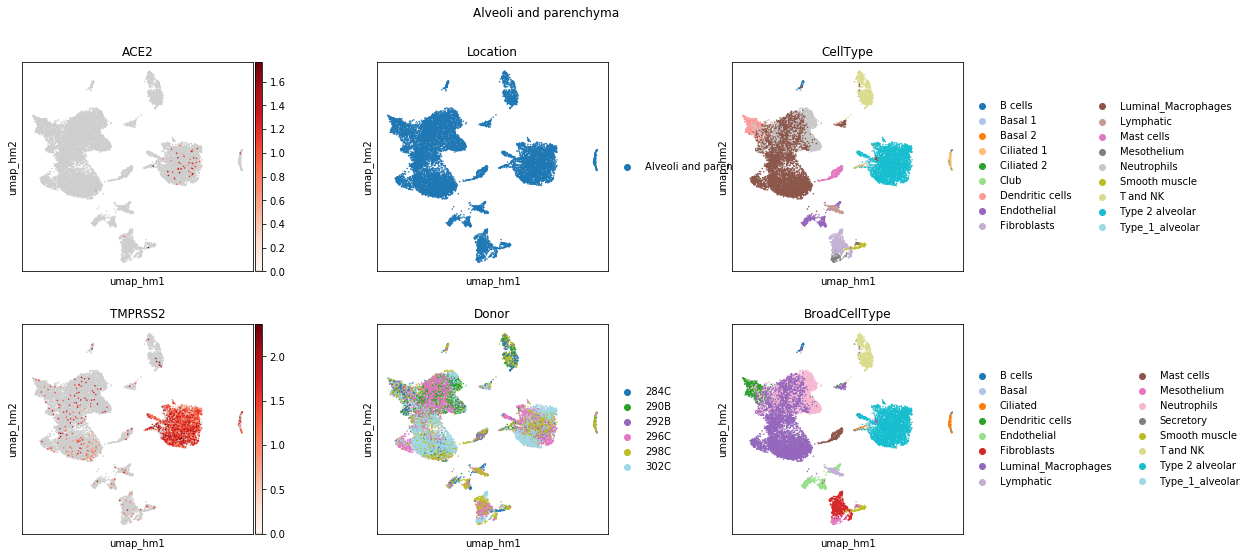

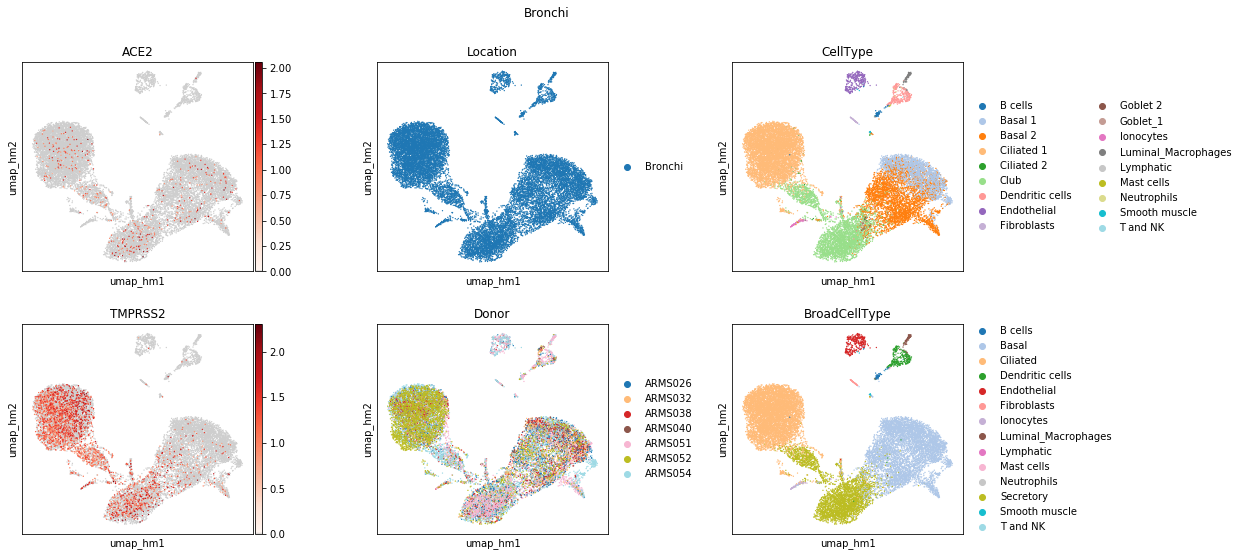

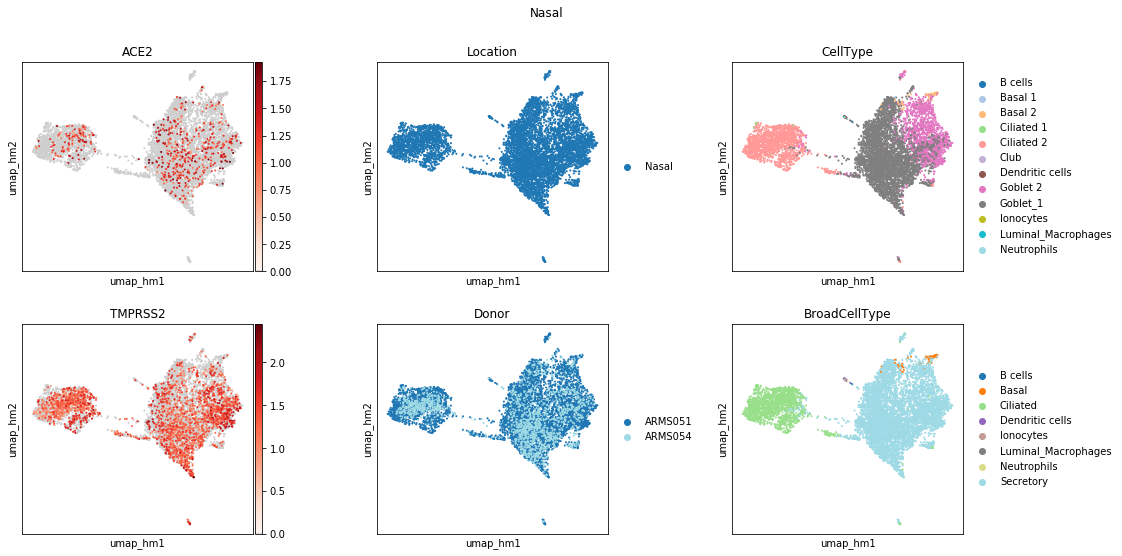

In [10]:
ss.lib.set_figsize((4, 4))
for ad in ads:
    ss.lib.clear_colors(ad)
    ss.lib.plot_scatter(
        ad, basis='umap_hm', color_map=expr_cmap, palette='tab20', ncols=3, wspace=0.4, show=False,
        color=['ACE2', 'Location', 'CellType', 'TMPRSS2', 'Donor', 'BroadCellType'])
    plt.gcf().suptitle(ad.obs.Location.unique()[0])

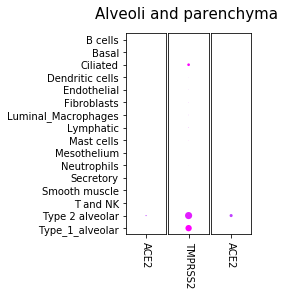

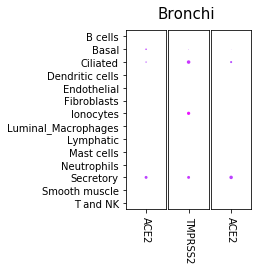

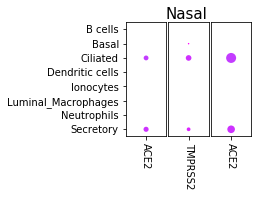

In [15]:
for ad in ads:
    fig, ax = plt.subplots(ncols=3, gridspec_kw={'wspace': 0.05})
    w1, h1 = ss.lib.dotplot2(
        ad, ['ACE2'], groupby='BroadCellType', mean_only_expressed=True, swap_axis=True, min_presence=5,
        title='', vmin=0, vmax=1.5, dot_max=0.15, color_map='cool', ax=ax[0])
    w2, h2 = ss.lib.dotplot2(
        ad, ['TMPRSS2'], groupby='BroadCellType', mean_only_expressed=True, swap_axis=True, omit_ylab=True, min_presence=5,
        title='', vmin=0, vmax=1.5, dot_max=0.75, color_map='cool', ax=ax[1])
    w3, h3 = ss.lib.dotplot2(
        ad, ['ACE2', 'TMPRSS2'], groupby='BroadCellType', mean_only_expressed=True, second_key_dependent_fraction=True,
        swap_axis=True, omit_ylab=True, min_presence=5,
        title='', vmin=0, vmax=1.5, dot_max=0.03, color_map='cool', ax=ax[2])
    fig.set_figwidth(w1 + w2 + w3)
    fig.set_figheight(max(h1, h2, h3))
    fig.suptitle(ad.obs.Location.unique()[0], fontsize=15)